# simple linear regression

* one explanatory variable
* one continuous response variable. 
* three parameters: intercept, slope, error variance
* relationship assumed linear, 
* Normal errors with zero mean.
* Homogeneous error variance 
* Independent errors

---

Explanatory and response variables have very different roles in the model. 

$x_i$: value of X for the $i$th datapoint.

$Y_i$: random variable representing the response for $i$.

* treat the values of the explanatory variable as fixed. 
* treat the response as a random variable. 

In [4]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import numpy.polynomial.polynomial as poly
%matplotlib inline

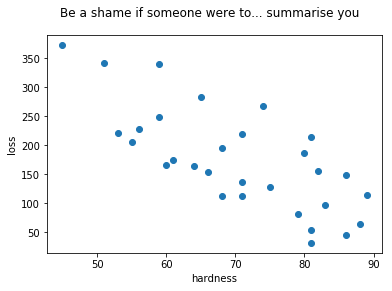

In [89]:
# Ex 3.1
rub = pd.read_csv("Data files/rubber.dat", sep="\s+")
xs = rub.hardness
ys = rub.loss
plt.scatter(xs, ys)
plt.xlabel(xs.name), plt.ylabel(ys.name)
plt.suptitle("Be a shame if someone were to... summarise you")
plt.show()

### Assumption 1: Linearity 

'Mean of response ($E(Y_i)$) depends on $x_i$ in a linear fashion.'
(linear in $x$ as well as in the parameters). 
$$$$
$$ E ( Y_i )= α + βx_i$$ for constant unknown $α$ and $β$. 

* The intercept $α$ provides the mean value of $Y$ when $x = 0$. 
* The slope $β$ is such that an increase of one unit in x results in an increaseof $β$ units in $E ( Y )$. 
* regression coefficients of the regression line: $α$ and $β$



* **linear in the parameters**: no parameter is an exponent nor multiplied nor divided by another parameter.
* **linear in the variables**: no variable is exponentiated.

$$y=β_0+β_1x_1+β_2x_2+ϵ$$

$$\text{(linear in variables & linear in parameters)}$$

.

$$ y=β_0 + β_1x_1+β_2x^2_1+ϵ $$

$$\text{(linear in parameters but not linear in variables)}$$

.

$$ y=β_0 + β_1x_1+β_2^\alpha x^2_1+ϵ $$

$$\text{(linear in neither sense)}$$


"a linear function of the $β$s" (linear in parameters) vs "a linear function of $x$s" (linear in variables). 

If it's linear in the parameters then we can treat it as a matrix and use all our mighty weaponry.

### Assumption 2: normal ‘errors’ averaging out

the variation of the response $Y i$ about its mean is represented by a random variable $\epsilon_i$ with a normal distribution. 

Thus:
$$Y_i = α + βx_i + \epsilon_i $$. 

with $E ( \epsilon_ i) = 0$.

### Assumption 3: Homogeneous error variance 

$σ^2 = V(\epsilon_i)$ same for all values of the explanans. $\epsilon_i ∼ N (0 ,σ^2)$. 

### Assumption 4: Independent errors

$\epsilon_i$ are independent of each other; deviations of the response from the mean are taken to be purely random; they do not affect each other.

In [3]:
def draw_gaussian_at(support, sd=1.0, height=1.0, 
                    xpos=0.0, ypos=0.0, ax=None, **kwargs):
    
    if ax is None:
        ax = plt.gca()
    
    gaussian = np.exp((-support ** 2.0) / (2 * sd ** 2.0))
    gaussian /= gaussian.max()
    gaussian *= height

    return ax.plot(gaussian + xpos, support + ypos, **kwargs)


### Conditional notation, $Y \,|\, x_i$

$$Y_i ∼ N ( α + βx_i ,σ^2 )$$ 

$Y_i$ are independent random variables and $x_i$ are values of the explanans.

: a regression model doesn't return a number, it returns a conditional distribution, here a normal centred on $E(Y | x_i)$

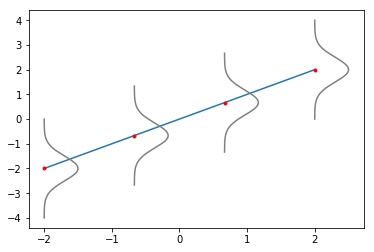

In [4]:
support = np.linspace(-2, 2, 1000)
plt.plot(support, support)
for x in np.linspace(-2, 2, 4):
    draw_gaussian_at(support, sd=0.5, height=0.5, \
                     xpos=x, ypos=x, color='gray')
    plt.plot(x,x, marker='o', \
         markersize=3, color="red",)

Only the mean changes; assumptions 2-4 imply that the conditional distribution ($E(Y) \pm \epsilon$) is otherwise the same.

There's also the simple simple regression, with no intercept, $Y_i ∼ N( γx_i,σ^2)$ (passes through origin)

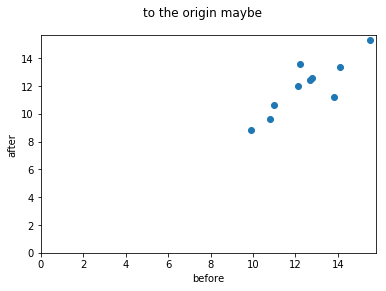

In [5]:
# Ex 3.3
bristol = pd.read_csv("Data files/bristol.dat", sep="\s+")
_, ax = plt.subplots()
ax.scatter(bristol.before, bristol.after)
plt.xlabel("before"), plt.ylabel("after")

ax.set_ylim(0)
ax.set_xlim(0)
plt.suptitle("to the origin maybe")
plt.show()

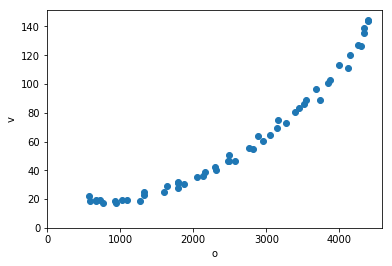

In [6]:
# Example 3.1
an = pd.read_csv("Data files/anaerob.dat", sep="\s+")
_, ax = plt.subplots()
ax.scatter(an.oxygen, an.ventil)
plt.xlabel("o"), plt.ylabel("v")

ax.set_ylim(0)
ax.set_xlim(0)
#plt.suptitle("to the origin maybe")
plt.show()

# o no

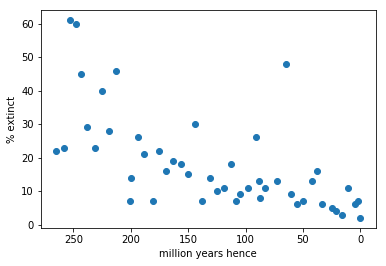

In [7]:
# Ex3.4
m = pd.read_csv("Data files/marine.dat", sep="\s+")
_, ax = plt.subplots()
ax.scatter(m.mybp, m.extinct)
plt.xlabel("million years hence"), plt.ylabel("% extinct")
#plt.suptitle("to the origin maybe")
plt.gca().invert_xaxis()
plt.show()

# o no outliers

OK, we've specified a model. How do we get $\alpha, \beta, \sigma^2$?

## least squares estimator

1. Get the residuals $r_i = y_i − \hat{y_i}$.
2. Loss function $\min \Sigma \, r_i^2$ leads directly to unique unbiased estimators:

$$  \hat{\beta}^* = \frac{n \Sigma x_i y_i - \Sigma x_i \Sigma y_i}{n \Sigma x_i^2 - (\Sigma x_i)^2 }  $$
$$ = \frac{n \times \text{sumProducts} - \text{productSums}}{n \times sumSquares - squareSums }  $$

---

$$  \hat{\alpha}^* = \bar{y} - \hat{\beta}\bar{x}  $$

---

$$ s^2 = \frac{\Sigma (y_i - \hat{y_i})^2} { n - 2 } $$

In [141]:
def ols_slope_estimator(xs, ys) :
    n = len(ys)
    sumProducts = sum(ys * xs)
    productSums = sum(xs) * sum(ys)
    numer = n*sumProducts - productSums
    
    squaredSumX = sum(xs)**2
    sumSquaresX = sum(xs**2)
    denom = n*sumSquaresX - squaredSumX
    
    return numer / denom


def ols_intercept_estimator(xs, ys, estSlope=None) :
    averageResponse = np.mean(ys)
    averageExplanatory = np.mean(xs)
    
    if not estSlope :
        estSlope = ols_slope_estimator(xs, ys)
    
    return averageResponse - estSlope * averageExplanatory
    

def simple_sample_error_variance(xs, ys, a, b) :
    preds = [(a + b*x) for x in xs]
    errors = ys - preds
    sse = sum(errors**2)
    # Corrected for two parameters a and b:
    n = (len(xs) - 2)
    
    return  sse / n


def simple_linear_regression_params(xs, ys) :
    beta = ols_slope_estimator(xs, ys)
    alpha = ols_intercept_estimator(xs, ys, beta)
    var = simple_sample_error_variance(xs, ys, alpha, beta)
    
    return alpha, beta, var


def simple_linear_regression(xs, ys) :
    model = sm.OLS(ys, sm.add_constant(xs))
    results = model.fit()
    
    return results.summary()

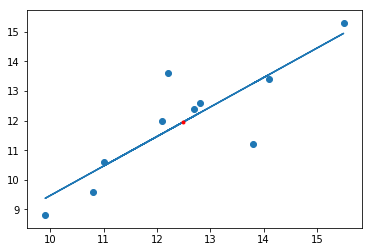

(array([-0.46465588,  0.99396764]),
 (-0.46465588154652515, 0.9939676446394334, 1.1603838771593098))

In [11]:
bristol = pd.read_csv("Data files/bristol.dat", sep="\s+")
_, ax = plt.subplots()
xs = bristol.before
ys = bristol.after
coefs = poly.polyfit(xs, ys, 1)
ffit = poly.polyval(xs, coefs)
ax.plot(xs, ffit)
ax.scatter(xs, ys)

# Plot mean point
ax.plot(np.mean(xs),np.mean(ys), marker='o', \
         markersize=3, color="red",)
plt.show()

coefs, simple_linear_regression_params(xs, ys)

The regression always passes through $(\bar{x}, \bar{y})$

# Why not use MLE?

$OLS \equiv MLE$ for SLR errors

"Residuals" (observed) $\neq$ "errors" (actuals)

### Errors strictly require the true line to be known

but we use $\hat{\alpha}$ and $\hat{\beta}$ cos w/e

[550.4151291512921, -5.336553071413073]

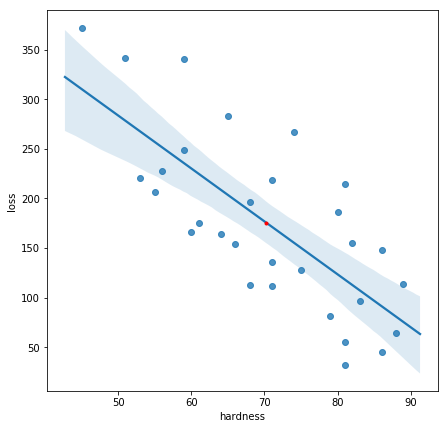

In [33]:
rub = pd.read_csv("Data files/rubber.dat", sep="\s+")
xs = rub.hardness
ys = rub.loss

coefs = poly.polyfit(xs, ys, 1)
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
sns.regplot(x="hardness", y="loss", \
            data=rub, ci=95)
plt.xlabel(xs.name), plt.ylabel(ys.name)

# Plot mean point
ax.plot(np.mean(xs),np.mean(ys), marker='o', \
         markersize=3, color="red",)

list(coefs)

[100.00210055013399, -0.0029035104094456672]

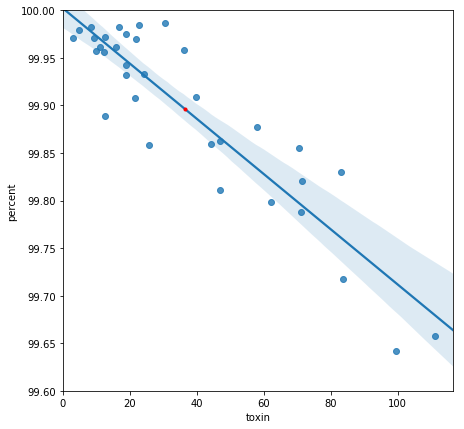

In [46]:
df = pd.read_csv("Data files/peanuts.dat", sep="\s+")
xs = df.toxin
ys = df.percent

coefs = poly.polyfit(xs, ys, 1)
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
sns.regplot(x=xs.name, y=ys.name, \
            data=df, ci=95)
plt.xlabel(xs.name), plt.ylabel(ys.name)
ax.set_ylim(99.6, 100)
ax.set_xlim(0)
# Plot mean point
ax.plot(np.mean(xs),np.mean(ys), marker='o', \
         markersize=3, color="red",)

list(coefs)

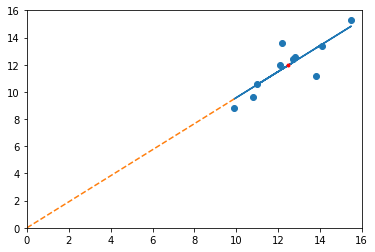

0.9573644144229374

In [64]:
# No intercept (constrain to origin)

def no_intercept_slr(xs, ys) :
    slope = sum(xs * ys) / sum(xs**2)
    
    return slope

    
df = pd.read_csv("Data files/bristol.dat", sep="\s+")
_, ax = plt.subplots()
xs = df.before
ys = df.after
constrainedSlope = no_intercept_slr(xs, ys)
ax.plot(xs, constrainedSlope*xs)
ax.scatter(xs, ys)
ax.set_ylim(0,16)
ax.set_xlim(0,16)
prev = np.array(range(0,11))
ax.plot(prev, constrainedSlope*prev, linestyle="--")

# Plot mean point
ax.plot(np.mean(xs),np.mean(ys), marker='o', \
         markersize=3, color="red",)
plt.show()

constrainedSlope

[244.7500000000001, 0.017499999999999422]

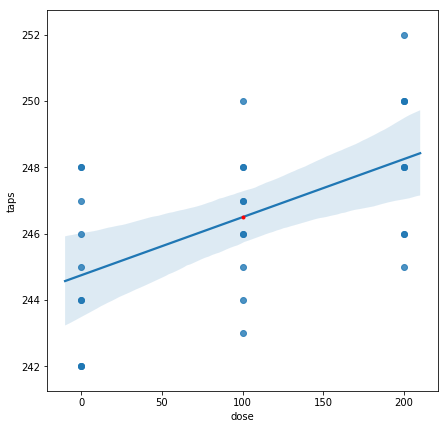

In [70]:
# ex 3.8

# What to do with discrete data (groups)?

# effect of caffeine on performance of a simple physical task. 
# three groups of ten, and the groups received different doses of caffeine (0, 100 and 200 mg). 
# number of taps per minute was recorded. 

df = pd.read_csv("Data files/taps.dat", sep="\s+")
xs = df.dose
ys = df.taps

coefs = poly.polyfit(xs, ys, 1)
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
sns.regplot(x=xs.name, y=ys.name, \
            data=df, ci=95)
# Plot mean point
ax.plot(np.mean(xs),np.mean(ys), marker='o', \
         markersize=3, color="red",)

list(coefs)

# Normal scatter with huge var

# These are of course just sample estimates of the parameter values

To infer the population values, we use results on the sampling distributions of the estimators. 

* For the unconstrained regression model, assuming that $\epsilon_i$ are normal, $\hat{α}$ and $\hat{β}$ are normally distributed around $\alpha$ and $\beta$. With various complicated things happening to their variance.

$$ s_{xx} = \Sigma \, (x_i - \bar{x})^2 $$

In [140]:
# S_xx
def sum_of_squared_deviations_from_mean(xs) :
    mu = np.mean(xs)
    squareDeviations = (xs - mu)**2
    
    return sum(squareDeviations)
    

def population_intercept_variance(xs, var) :
    n = len(xs)
    samplingVar = var / n
    meanSquareX = np.mean(xs)**2
    sxx = sum_of_squared_deviations_from_mean(xs)
    
    return samplingVar * (1 + n*meanSquareX/sxx)


def population_slope_variance(xs, var) :
    sxx = sum_of_squared_deviations_from_mean(xs)
    
    return var / sxx
    
# Not very useful: rely on pop var \sigma^2

## Use sample variance instead:

(3.6) $$ \frac{\hat{\beta} - \beta}{ s \,/ \sqrt{s_{xx}} } \sim t(n-2) $$

* Used to test the null hypothesis $β = 0$; left-hand becomes the $t$-statistic, and compared with $t(n-2)$ to calculate a significance probability. 

* Used to calculate confidence intervals

In [159]:
def t_of_null_beta(bHat, xs) :
    sxx = sum_of_squared_deviations_from_mean(xs)
    s2 = simple_sample_error_variance(xs, ys, a, b)
    
    return bHat / (np.sqrt(s2) / np.sqrt(sxx))


print("T: ", t_of_null_beta(bHat=-5.336553071413073, xs=rub.hardness))

T:  -5.782106789776833


In [186]:
# Ex 3.9

xs = rub.hardness
ys = rub.loss
coefs = poly.polyfit(xs, ys, deg=1)
summary = simple_linear_regression(xs, ys)

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           3.29e-06
Time:                        19:22:11   Log-Likelihood:                -164.62
No. Observations:                  30   AIC:                             333.2
Df Residuals:                      28   BIC:                             336.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        550.4151     65.787      8.367      0.000     415.657     685.173
hardness      -5.3366      0.923     -5.782      0.000      -7.227      -3.446
==============================================================================
Omnibus:                        6.229   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.622
Skew:                           0.416   Prob(JB):                        0.270
Kurtosis:                       1.814   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* "ss (Residual)": $\Sigma \, (\hat{y} - \bar{y})^2$, amount of variability remaining once model fitted
* "ss (Total)": $\Sigma \, (y - \bar{y})^2$, measure of total variation around the mean response
* "ss (Regression)": amount of variation the line explains, $\text{ss (Total)} - \text{ss (Residual)}$
---

* "df (Residual)": $n-2$
* "df (Total)": $n-1$
* "df (Regression)": 1 (# parameters)

---

* "ms (Residual)": $\text{ ss (Residual) / df (Residual) }= s^2$
* "ms (Total)": $\text{ ss (Total) / df (Total)  }$
* "ms (Regression)": $ \text{  ss (Regression) / df (Regression)  }$

---

* "vr": variance ratio, $\text{ ms (Regression) / ms (Residual) }$

## Standard error 

the standard deviation of its sampling distribution:

sample standard deviation / root of sum_of_squared_deviations_from_mean

$$ s.e.(\hat{\beta}) = \frac{s}{\sqrt{s_{xx}}} $$

In [138]:
def sum_squares_total(ys) :
    muY = np.mean(ys)
    return sum((ys - muY)**2)


def sum_squares_residual(xs, ys, a, b) :
    muY = np.mean(ys)
    preds = np.array([(a + b*x) for x in xs])
    return sum((muY - preds)**2)


def variance_ratio(xs, ys, a, b, numFactors=1) :
    sumSquareTotal = sum_squares_total(ys)
    sumSquareRegression = sum_squares_residual(xs, ys, a, b)
    #sumSquareResiduals = sumSquareTotal - sumSquareResiduals
    meanSquareReg = sumSquareRegression / numFactors
    meanSquareResiduals = simple_sample_error_variance(xs, ys, a, b)
    
    return meanSquareReg / meanSquareResiduals


# estimated standard error of observations
def standard_error_obs(xs, ys, aHat, bHat) :
    meanSquareResiduals = simple_sample_error_variance(xs, ys, aHat, bHat)
    
    return np.sqrt(meanSquareResiduals)


def standard_error_beta(xs, ys, aHat, bHat) :
    s = np.sqrt( simple_sample_error_variance(xs, ys, aHat, bHat) )
    sxx = sum_of_squared_deviations_from_mean(xs)
    
    return s / np.sqrt(sxx)



# VF = F stat
def f_test_pval(varRatio, df1, n):
    return 1 - stats.f.cdf(varRatio, df1, n-2)


# bHat / s * sqrt(sxx) = t stat
def t_test_pval(xs, b, n) :
    t = t_of_null_beta(bHat=b, xs=xs)
    return 1 - stats.t.cdf(t, n-2)


In [208]:
# Two hypothesis tests (of \beta = 0)

coefs = poly.polyfit(rub.hardness, rub.loss, deg=1)
a = coefs[0]
b = coefs[1]
n = len(rub.loss)

vr = variance_ratio(rub.hardness, rub.loss, a, b)
print("VR F test:", f_test_pval(vr, 1, n))
print("Beta stderr test:", 1- t_test_pval(rub.hardness, b, n)  )

simple_linear_regression(rub.hardness, rub.loss)

VR F test: 3.294488624128178e-06
Beta stderr test: 0.0007398280083763531


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           3.29e-06
Time:                        20:05:01   Log-Likelihood:                -164.62
No. Observations:                  30   AIC:                             333.2
Df Residuals:                      28   BIC:                             336.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        550.4151     65.787      8.367      0.000     415.657     685.173
hardness      -5.3366      0.923     -5.782      0.000      -7.227      -3.446
==============================================================================
Omnibus:                        6.229   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.622
Skew:                           0.416   Prob(JB):                        0.270
Kurtosis:                       1.814   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$P(F \geq 33.43)$ for $F\sim F(1,28)$

Under $H_0 : \beta = 0$, $VR \sim F(\text{df(Reg), df(Resid)})$

If $T ∼ t (ν)$ then $T^2 ∼F(1,ν)$.

In [189]:
# Ex 3.11

taps = pd.read_csv("Data files/taps.dat", sep="\s+")
xs = taps.dose
ys = taps.taps
coefs = poly.polyfit(xs, ys, deg=1)
a = coefs[0]
b = coefs[1]

n = len(xs)
# Manual tests
vr = variance_ratio(xs, ys, a, b)

print("VR F test:", f_test_pval(vr, 1, n))
print("Beta stderr test:", t_test_pval(xs, b, n)  )


simple_linear_regression(xs, ys)

VR F test: 0.0012992182433356758
Beta stderr test: 0.0006496091216678934


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   taps   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     12.77
Date:                Sun, 04 Nov 2018   Prob (F-statistic):            0.00130
Time:                        19:24:04   Log-Likelihood:                -65.046
No. Observations:                  30   AIC:                             134.1
Df Residuals:                      28   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.7500      0.632    387.200      0.000     243.455     246.045
dose           0.0175      0.005      3.574      0.001       0.007       0.028
==============================================================================
Omnibus:                        3.135   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                1.419
Skew:                           0.064   Prob(JB):                        0.492
Kurtosis:                       1.942   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. CIs

$\delta = 0.05$

$$ \hat{\beta} \pm [t_{1-\delta/2}(n-2)] \frac{s}{\sqrt{s_{xx}}} $$

$$ \hat{\alpha} \pm [t_{1-\delta/2}(n-2)] \, \sqrt{s^2 \left(\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}} \right)} $$

$$t(0.025), t(0.975)$$

In [234]:
def beta_interval(estimate, n, s, sxx, delta) :
    t = stats.t.ppf(1 - delta/2, n-2)
    stderr = s / np.sqrt(sxx)
    intval = t * stderr
    
    return estimate - intval, estimate + intval


def intercept_stderr(xs, s2) :
    n = len(xs)
    muXSquare = np.mean(xs)**2
    sxx = sum_of_squared_deviations_from_mean(xs)
    
    return np.sqrt( s2 * (1/n + muXSquare / sxx) )

    
def alpha_interval(xs, a, s2, delta) :
    stderr = intercept_stderr(xs, s2)
    t = stats.t.ppf(1 - delta/2, n-2)
    
    return a - t*stderr, a + t*stderr




def fit_and_hedge(xs, ys, delta=0.05) :
    a, b = poly.polyfit(xs, ys, deg=1)
    s2 = simple_sample_error_variance(xs, ys, a, b)
    sxx = sum_of_squared_deviations_from_mean(xs)
    
    print("alpha: ", alpha_interval(xs, a, s2, delta))
    betas = beta_interval(b, len(xs), np.sqrt(s2), sxx, delta) 
    print("beta: ", betas )
    
    return betas
    
    
#fit_and_hedge(taps.dose, taps.taps)


In [240]:
# Ex 3.12

xs = rub.hardness
ys = rub.loss
a, b = poly.polyfit(xs, ys, deg=1)
s2 = simple_sample_error_variance(xs, ys, a, b)
sterrA = intercept_stderr(xs, s2)
sterrB = standard_error_beta(xs, ys, a, b)

a, b, sterrA, sterrB, \
stats.t.ppf(1 - 0.05/2, len(xs)-2), \
fit_and_hedge(xs, ys, delta=0.05)


alpha:  (415.65723790305776, 685.1730203995265)
beta:  (-7.227115425498165, -3.445990717327981)


(550.4151291512921,
 -5.336553071413073,
 65.78667321484303,
 0.9229426687256054,
 2.048407141795244,
 (-7.227115425498165, -3.445990717327981))

alpha:  (2.1512097665201466, 71.6361027785413)
beta:  (0.8708088297254979, 5.9546718239635155)


((0.8708088297254979, 5.9546718239635155), 16.960713423192793)

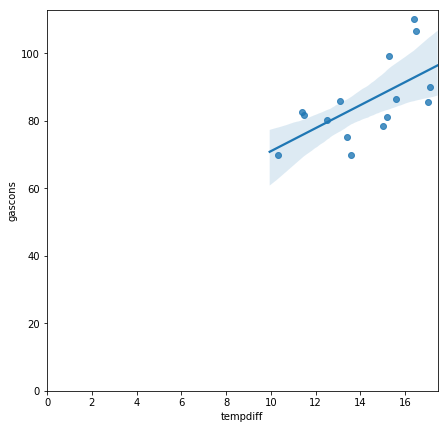

In [254]:
# Ex 3.13

temp = pd.read_csv("Data files/temperat.dat", sep="\s+")
xs = temp.tempdiff
ys = temp.gascons
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
sns.regplot(xs, ys)
ax.set_xlim(0)
ax.set_ylim(0)

coefs = poly.polyfit(xs, ys, deg=1)
a = coefs[0]
b = coefs[1]
sterrA = intercept_stderr(xs, simple_sample_error_variance(xs, ys, a, b)) 

fit_and_hedge(xs, ys), \
sterrA

$$ y = 36.89 + 3.41 x $$

Huge CI for intercept, because no data near there. Doesn't quite include 0, so unconstrained seems right.

Point predictions are all very well, but how to flag that it's an estimate?

1. true line unknown
2. variance around true line unknown

So? Not just parameter CIs; interval predictions (of the mean of $Y|x_i$)


* **confidence interval for the mean**: describes uncertainty in $\alpha + \beta x_0$ for given $x_0$
* **prediction interval**: describes uncertainty in $\alpha + \beta x_0 + \epsilon$ for given $x_0$

In [288]:
def prediction_stderr(x, xs, s, futureVar=False) :
    n = len(xs)
    muX = np.mean(xs)
    squareDeviance = (x - muX)**2
    sxx = sum_of_squared_deviations_from_mean(xs)
    
    correction = 1 if futureVar else 0
    
    return s * np.sqrt( squareDeviance / sxx + 1/n + correction)

    
# takes into account the sampling variability inherent in estimation of line: 
# gives a range of plausible values for the mean of Y_0
def confidence_interval_for_the_mean(aHat, bHat, x, xs, ys, delta=0.05) :
    n = len(xs)
    s2 = simple_sample_error_variance(xs, ys, a, b)
    stderr = prediction_stderr(x, xs, np.sqrt(s2))
    t = stats.t.ppf(1 - delta/2, n-2)
    intval = t * stderr
    
    point = aHat + bHat * x
    
    return point - intval, point + intval


# but does  not take into account the fact that Y 0  varies about its mean value

In [289]:
confidence_interval_for_the_mean(a, b, 4, temp.tempdiff, temp.gascons, delta=0.05)

(45.137897484931, 154.8430755320614)

In [262]:
# tiny bit wider.
# takes into account both types of variability, so that it provides a range of plausible values for the value that will be observed.
def prediction_interval(aHat, bHat, x, xs, delta=0.05) :
    n = len(xs)
    muX = np.mean(xs)
    squareDeviance = (x - muX)**2
    s2 = simple_sample_error_variance(xs, ys, a, b)
    sxx = sum_of_squared_deviations_from_mean(xs)
    stderr = np.sqrt( squareDeviance / sxx + 1/n + 1)
    t = stats.t.ppf(1 - delta/2, n-2)
    intval = t * np.sqrt(s2) * stderr
    
    point = aHat + bHat * x
    
    return point - intval, point + intval

estimation
and
prediction
close
to
the
bulk
of
the
data
are
reasonable
things
to
do,
but
estimation
and
prediction
beyond
the
range
of
the
data
are
much
less
reliable.

**extrapolation**: great
trust
in
the
continued
suitability
of
the
model
away
from
the
data.


(0.008680667214383741, (99.94907012825843, 99.97847829720018))

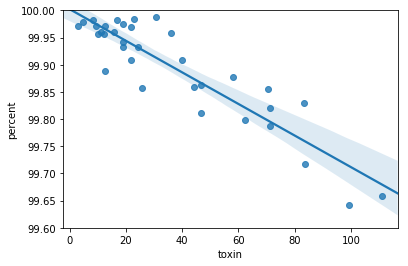

In [285]:
# Ex 3.14

# predict the mean percentage of non-contaminated peanuts in batches for which the 
# aflatoxin level in a sample is 13.2 parts per billion, in the form of a point estimate 
# and also a 90% confidence interval 
df = pd.read_csv("Data files/peanuts.dat", sep="\s+")
xs = df.toxin
ys = df.percent
x = 13.2

fig, ax = plt.subplots()
sns.regplot(xs, ys)
ax.set_ylim(99.6, 100)

coefs = poly.polyfit(xs, ys, deg=1)
a = coefs[0]
b = coefs[1]

s2 = simple_sample_error_variance(xs, ys, a, b)
point = a + b*x

prediction_stderr(x, xs, np.sqrt(s2)), \
confidence_interval_for_the_mean(a, b, x, xs, ys, delta=0.1)

In [293]:
# Include variance of future observation
# 90% prediction interval for the percentage of non-contaminated peanuts 
# for whichthe aflatoxin level ina sample  is13.2 parts per billion  
prediction_stderr(x, xs, np.sqrt(s2), futureVar=True)

prediction_interval(a, b, x, xs, delta=0.1)

(99.89555307242136, 100.03199535303725)

Goes over 100%...

# 4. Checking assumptions

* **residuals**: observed difference between actual response values and the fit. Let us check the errors.


1. Plot residuals against $x_i$.
2. Plot residuals against $\hat{y}$.

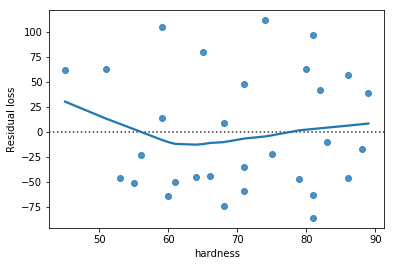

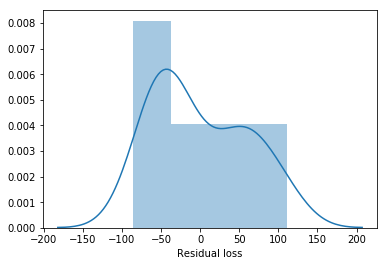

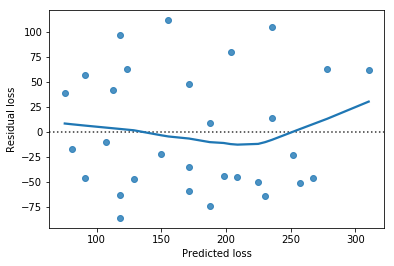

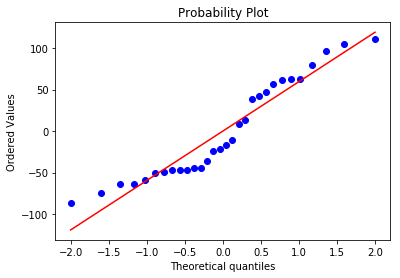

In [318]:
# Ex 3.15

xs = rub.hardness
ys = rub.loss

coefs = poly.polyfit(xs, ys, deg=1)
a = coefs[0]
b = coefs[1]

preds = [a + b*x for x in xs]
residuals = ys - preds

sns.residplot(xs, ys, lowess=True)
plt.ylabel("Residual loss")
plt.show()

sns.distplot(residuals)
plt.xlabel("Residual loss")
plt.show()

sns.residplot(preds, residuals, lowess=True)
plt.ylabel("Residual loss")
plt.xlabel("Predicted loss")
plt.show()

#plt.scatter(preds, residuals)
#plt.plot(range(45,91), [0]*46)

res = stats.probplot(residuals, plot=plt)

2nd plot is GenStat's "Simple Fitted Values" Model Checking
3rd plot is "Normal"

Residuals higher at the extremes, as usual

PP-plot is a bit curved, suggested skewed residuals.



### Standard resids

standardised deviance residuals = simple residuals / estimated standard error. 

The idea is to ‘calibrate’ the y-axis so that the plotted residuals individually have ~ standard normal. 

Counter-intuitive that residuals are not independent of each other: estimates of the independent random terms $\epsilon_i$. 
1. But: residuals have to sum to zero
2. Therefore, if you know all but one of them, you can work out the missing one. 
3. Hence they cannot be independent. 

**All residuals are standardised deviance residuals, unless stated otherwise.**

In [18]:
def residual_standard_error(resids, nParams=2) :
    rss = sum([r**2 for r in resids ])
    n = len(resids)
    return np.sqrt(rss / (n-nParams))


def standardise_residuals(resids):
    return resids / residual_standard_error(resids)

###    Why plot residuals?
    
 1. Per fitted column (x on x-axis): can indicate whether some aspect of the relationship has not been taken account of. NB: Looks the same as the Response residuals (y on x-axis) plot.
 
2. plot the residuals against the values of some _unfitted_ x. Can indicate you need to add it in.

Can detect big deviations from homoscedasticity (assumption of constant variance).

### Why PP-plot of the residuals?
1. Check assumption of normality of \epsilon_i.


Each can also highlight abnormally large residuals (potential outliers).


Temporal residual plot (data collected in time order): trends in the residuals indicate that the _\epsilon_i are not independent.

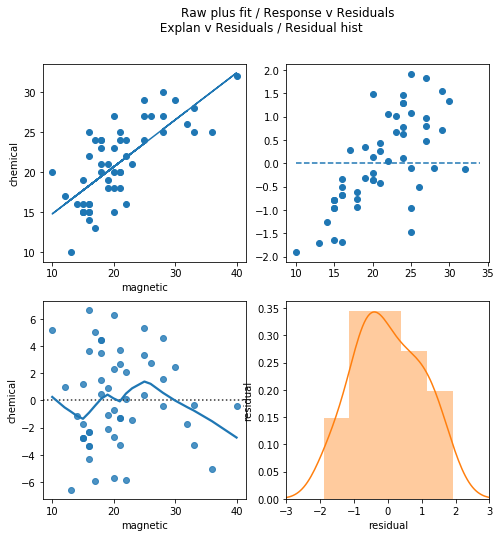

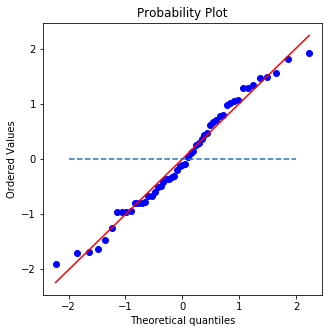

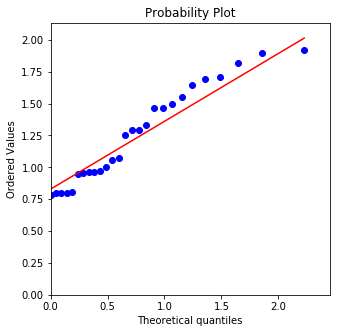

(Text(0.5,0,'Time'), Text(0,0.5,'Residual'))

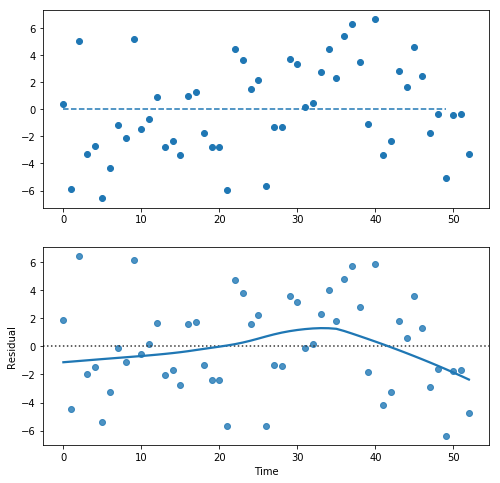

In [12]:
irn = pd.read_csv("Data files/iron.dat", sep="\s+")

# Fit and summarize OLS model
mod = sm.OLS(irn.chemical, sm.add_constant(irn.magnetic))
res = mod.fit()
model = lambda x : res.params['const'] + res.params['magnetic'] * x
predChem = model(irn.magnetic)
residuals = irn.chemical - predChem
stdResiduals = residuals / residual_standard_error(residuals)

fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs[0][0].scatter(irn.magnetic, irn.chemical)
axs[0][0].plot(irn.magnetic, predChem)
axs[0][0].set_xlabel("magnetic"), axs[0][0].set_ylabel("chemical")

plt.suptitle("                Raw plus fit / Response v Residuals \n Explan v Residuals / Residual hist")
axs[0][1].scatter(irn.chemical, stdResiduals)
axs[0][1].plot(range(10,35), [0]*25, linestyle="--")

plt.xlabel("chemical"), plt.ylabel("residual")
sns.residplot(irn.magnetic, irn.chemical, lowess=True, ax=axs[1][0])
plt.ylabel("residual")
sns.distplot(stdResiduals, ax=axs[1][1])
axs[1][1].set_xlim(-3,3)
axs[1][1].set_xlabel("residual")
plt.show()

fig, axs = plt.subplots(figsize=(5,5))
stats.probplot(stdResiduals, plot=plt)
plt.plot(range(-2,3), [0]*5, linestyle="--")
plt.show()

# Half-normal
fig, axs = plt.subplots(figsize=(5,5))
stats.probplot(abs(stdResiduals), plot=plt)
plt.xlim(0), plt.ylim(0)
plt.show()

# Residuals over time
fig, axs = plt.subplots(2, 1, figsize=(8,8))
axs[0].scatter(irn.index, residuals)
axs[0].plot(range(50), [0]*50, linestyle="--")
sns.residplot(np.array(irn.index), residuals, lowess=True, ax=axs[1])
plt.xlabel("Time"), plt.ylabel("Residual")


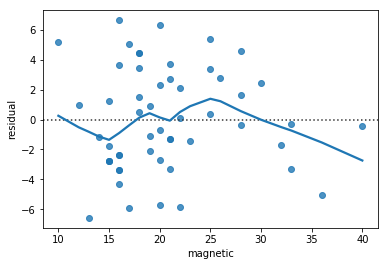

In [11]:
# residuals tend to be negative for points early in time and positive for most of the second half.
# Therefore evidence of some sort of lack of independence between successive residuals

sns.residplot(irn.magnetic, irn.chemical, lowess=True)
plt.ylabel("residual")
plt.show()
# Not mean zero after 30 magnetism; not normal errors.


Not mean zero after 30 magnetism; not normal errors.


### GenStat on outliers

Residuals follow standard normal distribution.
#So threshold based on the standard normal distribution used to find possible outliers.

When $(n-2) ≤ 20$, outlier if $( |\,r\,| > 1.96 s.e.$
(central 95% of the standard normal lies in (−1.96, 1.96)).

For larger $n$, higher thresholds are used to limit the number of residuals flagged as possible outliers in situations where there is in fact no problem with the fit of the model.


In [98]:
# Takes simple residuals
def outliers(df, alpha=0.05) :
    if (len(df) - 2) < 20 :
        ile = stats.norm.ppf(1 - alpha/2)
    else :
        ile = stats.norm.ppf(1 - alpha/10)
    df['residual'] = df['residual'] \
                    / residual_standard_error(df['residual'])
    
    return df[ abs(df['residual']) > ile ]


cream = pd.read_csv("Data files/cream.dat", sep="\s+")
mod = sm.OLS(cream.pints, sm.add_constant(cream.temp))
res = mod.fit()
model = lambda x : res.params['const'] + res.params['temp'] * x
preds = model(cream.temp)
residuals = cream.pints - preds
cream["residual"] = residuals
outliers(cream)



,pints,price,income,temp,residual
29,0.548,0.26,90,71,2.851653


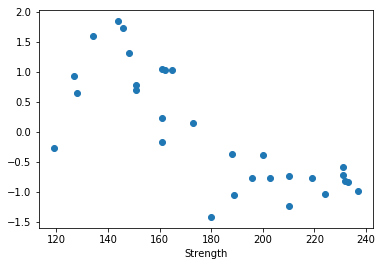

In [9]:
# Plotting residuals against an unfitted variable
cream = pd.read_csv("Data files/rubber.dat", sep="\s+")
mod = sm.OLS(cream.loss, sm.add_constant(cream.hardness))
res = mod.fit()
model = lambda x : res.params['const'] + res.params['hardness'] * x
preds = model(cream.hardness)
residuals = cream.loss - preds
stdResiduals = residuals / residual_standard_error(residuals)

plt.scatter(cream.strength, stdResiduals)
plt.xlabel("Strength")
plt.show()

Pretty blatant negative relationship between residuals and tensile strength.
#

Take 2 rubber samples with the same hardness but very different strengths. According to the SLR loss v hardness, they would  have the same loss. This plot indicates that the sample with higher strength is likely to suffer less loss.
#

Overall, therefore, the simple linear regression of abrasion loss against one explanatory variable, hardness, is not adequate to describe the data. We need a more complicated model involving tensile strength.


## 5. Transformations

Your model sucks? What to do?

* Add variables cautiously.
* transform the data.

if SLR model is not appropriate, it might be possible to find a transformation of $y$ and/or $x$ such that the relationship between the transformed variables is fitting for SLR.

two approaches to transform.

1. aprior. known theory about relation of quantities involved. Often such theory or knowledge can suggest appropriate transformations that can lead to a linear relationship.

2. empiric. look at plots and choose transformations that appear to lead to straight-line relationships with the right properties. This empirical approach often involves a certain amount of trial and error before an appropriate transformation is found.

Only handle power transformations for now - which limits us to transforming monotonic functions (either increasing or decreasing).


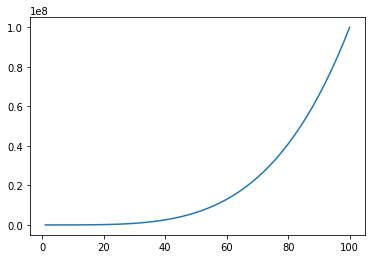

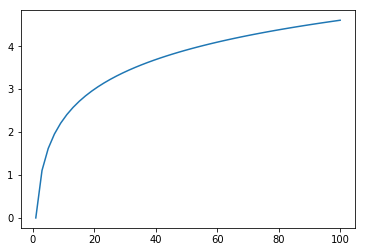

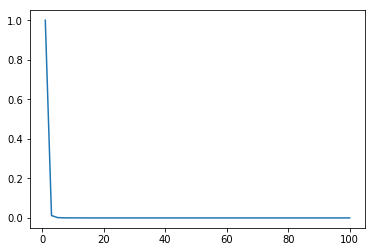

In [3]:
# Some monotonic functions
x = np.linspace(1,100)
a = 4
plt.plot(x, x**a)
plt.show()
# slopes upwards from left to right for all positive x.
#The same is true of log x.
plt.plot(x, np.log(x))
plt.show()
# In no case does the graph increase and then decrease (or vice versa).
a = -4
plt.plot(x, x**a)
plt.show()

In [93]:
def residual_analysis(df, x, y, model) :
    preds = model(df[x])
    residuals = df[y] - preds
    stdResiduals = residuals / residual_standard_error(residuals)
    
    fig, axs = plt.subplots(2, 2, figsize=(8,8))
    axs[0][0].scatter(df[x], df[y])
    axs[0][0].plot(df[x], preds)
    axs[0][0].set_xlabel(x), axs[0][0].set_ylabel(y)
    plt.suptitle("                Raw plus fit / Response v Residuals \n Explan v Residuals / Residual hist")
    
    axs[0][1].scatter(df[y], stdResiduals)
    xRange = np.arange(df[y].min(), df[y].max(), df[y].max()/10)
    axs[0][1].plot(xRange, [0]*len(xRange), linestyle="--", color="gray")
    plt.xlabel(y), plt.ylabel("residual")
    
    sns.residplot(df[x], df[y], lowess=True, ax=axs[1][0])
    plt.ylabel("residual")
    
    sns.distplot(stdResiduals, ax=axs[1][1])
    axs[1][1].set_xlabel("residual")
    plt.show()
    
    fig, axs = plt.subplots(figsize=(5,5))
    stats.probplot(stdResiduals, plot=plt)
    plt.show()


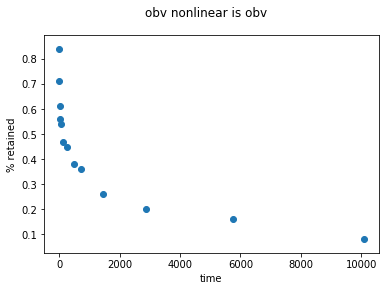

In [14]:
# Example 3.2 - Mosteller on memory

mnem = pd.read_csv("Data files/strong.dat", sep="\s+")
plt.scatter(mnem.t, mnem.p )
plt.xlabel("time"), plt.ylabel("% retained"),
plt.suptitle("obv nonlinear is obv")
plt.show()



Hypothesis : relation is of form
$$ p = C \exp(-\beta t)  $$
or

$$ \log{p} = \log{ C} -\beta t  $$

(Text(0.5,0,'time'), Text(0,0.5,'log %'))

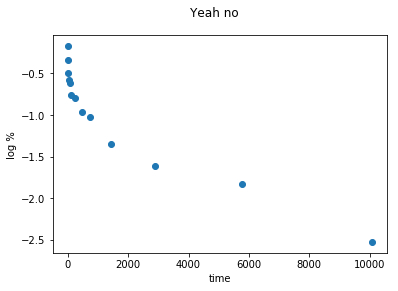

In [15]:
plt.scatter( mnem.t, np.log(mnem.p) )
plt.suptitle("Yeah no")
plt.xlabel("time"), plt.ylabel("log %"),

when straightening out a relationship, it is often good practice to transform the explanans rather than the response.

Why?

In [ ]:
mnem["logT"] = np.log(mnem.t)
mod = sm.OLS( mnem.p, sm.add_constant(mnem.logT) )
res = mod.fit()
model = lambda x : res.params['const'] + res.params['logT'] * x
preds = model(mnem.logT)
plt.scatter( mnem.logT, mnem.p )
plt.plot( mnem.logT, preds )
plt.show()
residual_analysis(mnem, "logT", "p", model)
# some evidence of curvature, generally the model fits reasonably well


### What to do about heteroscedasticity?

* Transform the response
* Nonnormal error distributions
* Weighted least squares


make the variance constant? -> transform y-axis

straighten  out the mean? -> transform x-axis


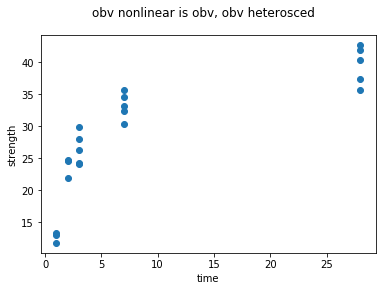

In [5]:
cem = pd.read_csv("Data files/cemstren.dat", sep="\s+")
xs = cem.curetime
ys = cem.strength
plt.scatter(xs, ys )
plt.xlabel("time"), plt.ylabel("strength"),
plt.suptitle("obv nonlinear is obv, obv heterosced")
plt.show()


* relationship far from linear.
* variability greater for high strengths than for low strengths, so no assumption of constant variance

Too much variance in the $y$ direction. So aim to reduce the spread of the higher values.



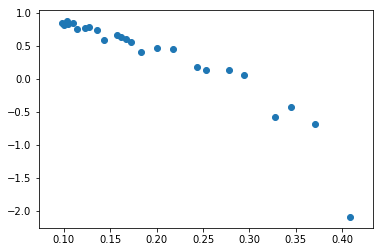

In [11]:
# towards the left on the ladder of powers — something like a square root, a logarithm or a reciprocal
plt.scatter(1/xs, np.log(ys) )

# Bit contrived: we're saying that the relationship between the log of strength and inverse time is linear

Index(['output', 'speed'], dtype='object')


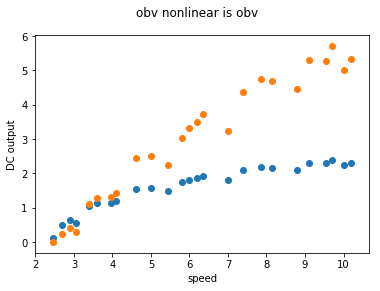

In [31]:
w = pd.read_csv("Data files/wind.dat", sep="\s+")
print(w.columns)
xs = w.speed
ys = w.output
plt.scatter(xs, ys )
plt.xlabel("speed"), plt.ylabel("DC output"),
plt.suptitle("obv nonlinear is obv")

plt.scatter(xs, ys**2 )
plt.show()

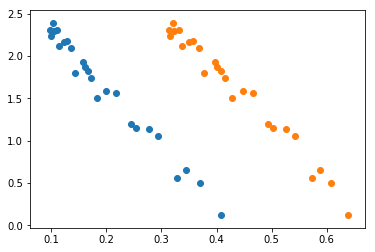

In [33]:
# But we've caused heteroscedasticity ^^

# Try transforming the xs, which won't increase y scatter

plt.scatter(1/xs, ys )
plt.scatter(1/np.sqrt(xs), ys )

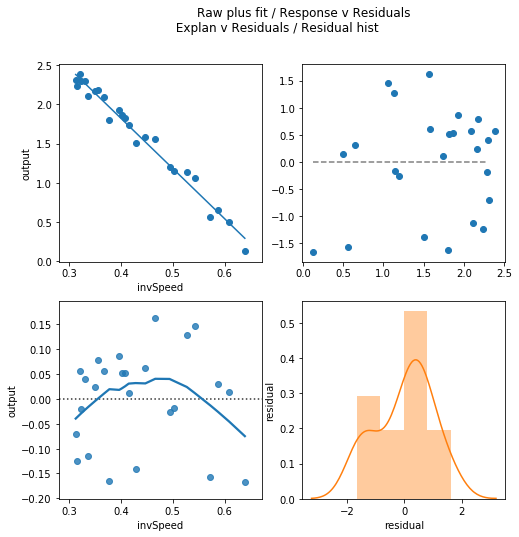

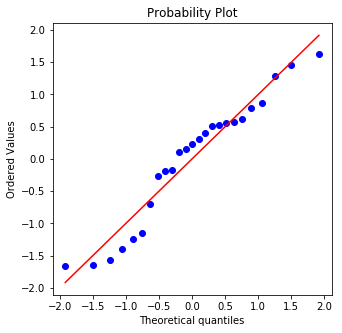

const       4.389716
invSpeed   -6.415973
dtype: float64

In [36]:
w["invSpeed"] = 1 / np.sqrt(w.speed)
mod = sm.OLS( w.output, sm.add_constant(w.invSpeed) )
res = mod.fit()
model = lambda x : res.params['const'] + res.params['invSpeed'] * x
a = residual_analysis(w, "invSpeed", "output", model)
res.params

y transform is worse so our line is

$$ y = 4.39 - \frac{6.4}{\sqrt{x}} $$

despite non-normal PP-plot and wonky histogram

Index(['hardness', 'density'], dtype='object')


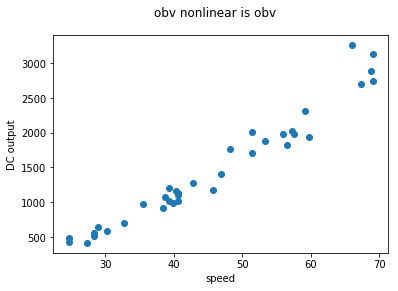

In [48]:
h = pd.read_csv("Data files/hardness.dat", sep="\s+")
print(h.columns)
xs = h.density
ys = h.hardness
plt.scatter(xs, ys )
plt.xlabel("speed"), plt.ylabel("DC output"),
plt.suptitle("obv nonlinear is obv")
plt.show()

# Fanning out too much

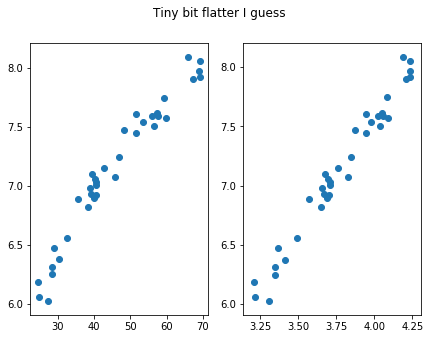

In [62]:
plt.subplot(1, 2, 1)
plt.scatter(xs, np.log(ys) )
fig = plt.gcf()
fig.set_size_inches(7, 5)

plt.subplot(1, 2, 2)
plt.scatter(np.log(xs), np.log(ys) )
plt.suptitle("Tiny bit flatter I guess")
plt.show()

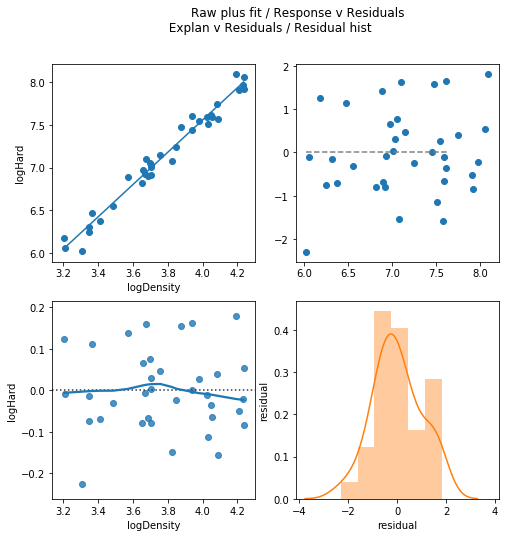

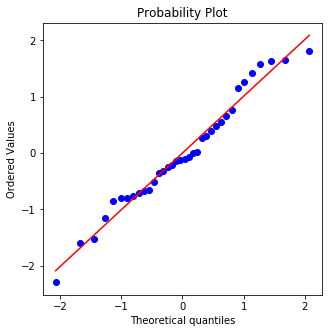

,hardness,density,logDensity,logHard,residual


In [101]:
h['logDensity'] = np.log(h.density)
h['logHard'] = np.log(h.hardness )
mod = sm.OLS( h.logHard, sm.add_constant(h.logDensity) )
#mod = sm.OLS( h.logHard, sm.add_constant(h.logDensity) )
res = mod.fit()
model = lambda x : res.params['const'] + res.params['density'] * x
residual_analysis(h, "logDensity", "logHard", model)

preds = model(h.logDensity)
residuals = h.logHard - preds
h["residual"] = residuals
outliers(h, alpha=0.05)

## 6. Slope comparison

Test of slope equality for two lines.

Some important questions whose answers depend on whether different regression lines have the same slope

Index(['town', 'mortalty', 'calcium', 'north'], dtype='object')


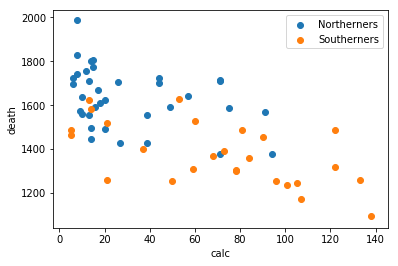

In [122]:
# Example  3.3  Impact  of  calcium  concentration  and  location  on  mortality 
# Interrogate claim "lower  mortality  rates in areas with harder water"

w = pd.read_csv("Data files/water.dat", sep=",")
print(w.columns)
xs = w.calcium
ys = w.mortalty
#plt.scatter(xs, ys )
plt.xlabel("calc"), plt.ylabel("death"),

n = w[w.north == 1]
s = w[w.north == 0]
plt.scatter(n.calcium, n.mortalty, label="Northerners")
plt.scatter(s.calcium, s.mortalty, label="Southerners")

plt.legend()
plt.show()

# Claim holds up in both north and south

0.1613762941973642


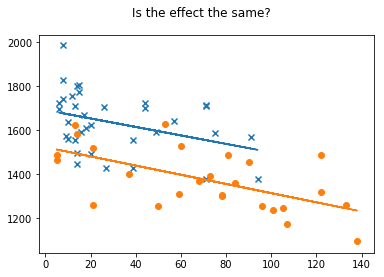

In [134]:
resN = sm.OLS( n.mortalty, sm.add_constant(n.calcium) ).fit()
modelNorth = lambda x : resN.params['const'] + resN.params['calcium'] * x
#residual_analysis(n, "calcium", "mortalty", modelNorth)

resS = sm.OLS( s.mortalty, sm.add_constant(s.calcium) ).fit()
modelSouth = lambda x : resS.params['const'] + resS.params['calcium'] * x
#residual_analysis(n, "calcium", "mortalty", modelNorth)

plt.scatter(n.calcium, n.mortalty, marker="x")
plt.plot(n.calcium, modelNorth(n.calcium))
plt.scatter(s.calcium, s.mortalty, marker="o")
plt.plot(s.calcium, modelSouth(s.calcium))
plt.suptitle("Is the effect the same?")
"""
preds = model(n.calcium)
residuals = n.mortalty - preds
n["residual"] = residuals
outliers(n, alpha=0.05)
"""
print(resN.params['calcium'] - resS.params['calcium'])

In [156]:
# Slope estimators are ~ N, so difference is ~ N
# Var of difference = var slope1 + var slope2
# True if difference is more than 2 stddevs from 0
def crudely_reject_slope_equality(xs1, ys1, xs2, ys2, \
                              alpha1, alpha2, \
                              beta1, beta2) :
    se1 = standard_error_beta(xs1, ys1, alpha1, beta1)
    se2 = standard_error_beta(xs2, ys2, alpha2, beta2)
    diffVar = se1**2 + se2**2
    diff = beta1 - beta2
    
    return abs(diff) > 1.96 * np.sqrt(diffVar)


# So under the null hypothesis, difference is normal with N(0, 1.02)
crudely_reject_slope_equality(n.calcium, n.mortalty, \
                          s.calcium, s.mortalty, \
                          resN.params['const'], resS.params['const'], \
                          resN.params['calcium'], resS.params['calcium'])

False

the observed value is well under one standard deviation away from its mean under the null hypothesis. p value should be high, and thereare no grounds for rejecting the null hypothesis of equal slopes.

# 7. Extensions

What can categorical regression solve?

e.g. "What's the mortality difference between North and South?" Previously two models:

$$E(\text{South death}) = \alpha_S + \beta x$$
$$E(\text{North death}) = \alpha_S + \delta + \beta x$$

(where $\delta$ is an extra intercept)

OR

Define dummy variable $z$, 0 in South and 1 in North.

$$E(death) = \alpha_S + \delta z + \beta x$$

multiple
regression
methods
with
categorical
explanatory
variables
can
be
used
to
answer
questions
about
things like differences
between
regression
intercepts.

## 8. Association

These people think regression implies "directionality" while association does not. This is something besides causation but they don't say what.

It is probably the fixed/random direction; explanans are treated as given, with response imagined random.

* **Pearson product-moment correlation coefficient**: measure of linear association; high modulus when relationship is strong and roughly linear. if X and Y are independent, the population corr, $r = 0$

In [ ]:
# Roughly right
def pearson_r(X, Y) :
    muX, muY = np.mean(X), np.mean(Y)
    sX, sY = np.std(X), np.std(Y)
    
    xErrors, yErrors = X - muX, Y - muY
    sumOfPairedErrorProducts = np.sum( xErrors * yErrors )
    besselN = len(X) - 1
    covariance = sumOfPairedErrorProducts / besselN
    jointStd = sX * sY

    return covariance / jointStd


df = pd.read_csv("Data files/rubber.dat", sep="\s+")
print( pearson_r( df.hardness, df.strength ) )
df = pd.read_csv("Data files/digoxin.dat", sep="\s+")
pearson_r( df.ldigoxin, df.lcreatin )

Correlations most useful for reducing model complexity.

If explanatories exhibit strong relationships with one another, we need only include a subset in the model: little extra information to be gained, since they behave like repeats of the included.

Correlation is not necessarily indicative of a causative effect.
(Nor indeed are regression relationships necessarily causative.)

"Causation, which is not an entirely well-defined concept, has to be established by routes other than correlation and regression. Typically, the aim is to carry out a study such that any posited causal relationship can be the only plausible explanation for the effects of interest."
